<a href="https://colab.research.google.com/github/BautistaDavid/Monitorias_2021_2/blob/main/Monitoria6_SEDNHL_SEDNL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SEDLNH**

In [10]:
from sympy import * # importamos Sympy 
#from sympy import Eq,exp,Symbol,Function,dsolve


In [6]:
#definamos variables del moodelo

t=Symbol("t")
x=Function("x")
y=Function("y")


y(t)

In [12]:
expr1=Eq(x(t).diff(t),-2*x(t)+y(t)+2*exp(-t))
expr1

Eq(Derivative(x(t), t), -2*x(t) + y(t) + 2*exp(-t))

In [13]:
expr2=Eq(y(t).diff(t),x(t)-2*y(t)+3*t)
expr2


Eq(Derivative(y(t), t), 3*t + x(t) - 2*y(t))

In [15]:
# Solucionamos el sistema usando funcion dsolve

sistema=dsolve([expr1,expr2])
sistema

[Eq(x(t), -C2*exp(-3*t) + t + t*exp(-t) + (C1 + 1/2)*exp(-t) - 4/3),
 Eq(y(t), C2*exp(-3*t) + 2*t + t*exp(-t) + (C1 - 1/2)*exp(-t) - 5/3)]

In [16]:
#accedemos a la primera parte de la solucion 

sistema[0]

Eq(x(t), -C2*exp(-3*t) + t + t*exp(-t) + (C1 + 1/2)*exp(-t) - 4/3)

In [17]:
#accedemos a la segunda parte de la solucion 
sistema[1]

Eq(y(t), C2*exp(-3*t) + 2*t + t*exp(-t) + (C1 - 1/2)*exp(-t) - 5/3)

In [19]:
expr1=Eq(x(t).diff(t),-2*x(t)+y(t))
expr2=Eq(y(t).diff(t),x(t)-2*y(t))

sistema2=dsolve([expr1,expr2])
sistema2[0]

Eq(x(t), -C1*exp(-3*t) + C2*exp(-t))

In [21]:
sistema2[1]

Eq(y(t), C1*exp(-3*t) + C2*exp(-t))

# SED no lieneales

$$\dot{X}=x(3-x-2y)\\
\dot{Y}=y(2-x-y)\\
\\
$$
1. 
$$\dot{X}=0\\
\dot{Y}=0$$

2. Nulclinas 
3. Puntos de Equilibrio 

In [32]:
x,y=symbols("x,y")
expr1=Eq(x*(3-x-2*y),0)
expr2=Eq(y*(2-x-y),0)

# nulclinas 
solve(expr1)[1]



{y: 3/2 - x/2}

In [43]:
# nulclina

#solve(expr2,y)[1]
solve(expr2)[0]

{x: 2 - y}

In [30]:
# Puntos de Equilibrio del sistema
solve([expr1,expr2])

[{x: 0, y: 0}, {x: 0, y: 2}, {x: 1, y: 1}, {x: 3, y: 0}]

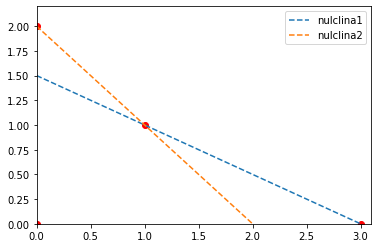

In [79]:
# Graficamos Puntos de Equilibrio 

import matplotlib.pyplot as plt 
import numpy as np
X=np.linspace(0,100)
plt.plot(X,3/2-X/2,label="nulclina1",linestyle="--")
plt.plot(X,2-X,label="nulclina2",linestyle="--")
plt.ylim(0,2.2)
plt.xlim(0,3.1)
plt.scatter(x=[0,0,1,3],y=[0,2,1,0],color="red",marker="o")
plt.legend()


In [63]:
#Jacobianos 

def jac_22(f,g):
    variables = f.free_symbols
    jacobiano = []
    for funcion in (f,g):
        vector = []
        for variable in variables:
            vector.append(diff(funcion, variable))
        jacobiano.append(vector)
    
    return Matrix(jacobiano)


In [66]:
jacobiano=jac_22(x*(3-x-2*y),y*(2-x-y))

In [67]:
jacobiano

Matrix([
[-2*x - 2*y + 3,         -2*x],
[            -y, -x - 2*y + 2]])

In [75]:
#valores de lambda para cada punto de Equilibrio 

for i in [{x: 0, y: 0}, {x: 0, y: 2}, {x: 1, y: 1}, {x: 3, y: 0}]:
  a=(jacobiano.subs(i)).eigenvals()
  print(f"lambdas punto de Equilibrio {i}={list(a.keys())}")

lambdas punto de Equilibrio {x: 0, y: 0}=[3, 2]
lambdas punto de Equilibrio {x: 0, y: 2}=[-1, -2]
lambdas punto de Equilibrio {x: 1, y: 1}=[-sqrt(2) - 1, -1 + sqrt(2)]
lambdas punto de Equilibrio {x: 3, y: 0}=[-3, -1]
